# Linear Regression 

## import library

In [1]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [2]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]

## plot the data in the three dimensional space

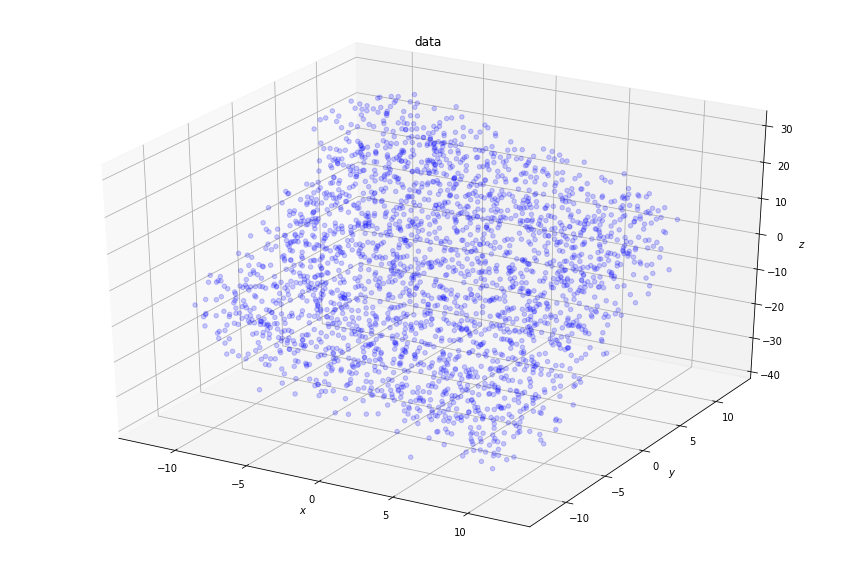

(3,)
(2500,)
(2500,)
[ -4.44258001 -11.13841865  -6.68718553 ...   6.78619211  12.84201454
  10.33594982]
[  4.44258001  11.13841865   6.68718553 ...  -6.78619211 -12.84201454
 -10.33594982]


In [3]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()


X = np.zeros((xx.shape[0],3))
for i in range(0,xx.shape[0]):
    X[i] = [1, xx[i], yy[i]]

t = np.array((1,1,1))
print(t.shape)
a = X@t
print(a.shape)
print((zz.T).shape)
print(a - zz)
print(-1*(a - zz))

## compute the loss function

In [4]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    
    num_data = x.shape[0]
    X = np.zeros((num_data,3))
    for i in range(0,num_data):
        X[i] = [1, x[i], y[i]]
    
    f_hat = X @ theta
    residual = z.T - f_hat
    
    # ============================
    return residual, num_data

In [5]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    
    R, n = compute_residual(theta,x,y,z)
    R = -1*R
    loss = (1/(2*n))*R.T@R
    
    #loss = 0
    #for i in range(0,x.shape[0]):
    #    r = theta[0] + theta[1]*x[i] + theta[2]*y[i] -z[i]
    #    loss = loss + r**2
    #        
    #loss = (1/(2*x.shape[0]))*loss
    
    # ============================
    return loss

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [6]:
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    
    R, n = compute_residual(theta,x,y,z)
    R = -1*R
    
    X = np.zeros((n,3))
    for i in range(0,n):
        X[i] = [1, x[i], y[i]]
        
    grad = (1/n)*X.T@R    
        
    # ============================
    return grad

## gradient descent for each model parameter

In [7]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

for i in range(num_iteration):
    # ===== FILL UP THE CODE =====
    
    theta = theta - learning_rate*compute_gradient(theta,xx,yy,zz)
    loss = compute_loss(theta,xx,yy,zz)
    
    theta_iteration[i] = theta
    loss_iteration[i] = loss

    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))

iteration =    0, loss = 46.08423
iteration =    1, loss = 25.70661
iteration =    2, loss = 17.25197
iteration =    3, loss = 13.71586
iteration =    4, loss = 12.20934
iteration =    5, loss = 11.54086
iteration =    6, loss = 11.21896
iteration =    7, loss = 11.04093
iteration =    8, loss = 10.92313
iteration =    9, loss = 10.83106
iteration =   10, loss = 10.75047
iteration =   11, loss = 10.67546
iteration =   12, loss = 10.60359
iteration =   13, loss = 10.53382
iteration =   14, loss = 10.46572
iteration =   15, loss = 10.39908
iteration =   16, loss = 10.33383
iteration =   17, loss = 10.26989
iteration =   18, loss = 10.20723
iteration =   19, loss = 10.14582
iteration =   20, loss = 10.08563
iteration =   21, loss = 10.02664
iteration =   22, loss = 9.96883
iteration =   23, loss = 9.91217
iteration =   24, loss = 9.85663
iteration =   25, loss = 9.80220
iteration =   26, loss = 9.74885
iteration =   27, loss = 9.69657
iteration =   28, loss = 9.64532
iteration =   29, los

iteration =  251, loss = 7.14998
iteration =  252, loss = 7.14941
iteration =  253, loss = 7.14885
iteration =  254, loss = 7.14831
iteration =  255, loss = 7.14777
iteration =  256, loss = 7.14725
iteration =  257, loss = 7.14674
iteration =  258, loss = 7.14623
iteration =  259, loss = 7.14574
iteration =  260, loss = 7.14526
iteration =  261, loss = 7.14478
iteration =  262, loss = 7.14432
iteration =  263, loss = 7.14386
iteration =  264, loss = 7.14342
iteration =  265, loss = 7.14298
iteration =  266, loss = 7.14255
iteration =  267, loss = 7.14213
iteration =  268, loss = 7.14172
iteration =  269, loss = 7.14132
iteration =  270, loss = 7.14092
iteration =  271, loss = 7.14053
iteration =  272, loss = 7.14015
iteration =  273, loss = 7.13978
iteration =  274, loss = 7.13942
iteration =  275, loss = 7.13906
iteration =  276, loss = 7.13871
iteration =  277, loss = 7.13836
iteration =  278, loss = 7.13803
iteration =  279, loss = 7.13770
iteration =  280, loss = 7.13737
iteration 

iteration =  509, loss = 7.12160
iteration =  510, loss = 7.12160
iteration =  511, loss = 7.12160
iteration =  512, loss = 7.12159
iteration =  513, loss = 7.12159
iteration =  514, loss = 7.12159
iteration =  515, loss = 7.12159
iteration =  516, loss = 7.12158
iteration =  517, loss = 7.12158
iteration =  518, loss = 7.12158
iteration =  519, loss = 7.12157
iteration =  520, loss = 7.12157
iteration =  521, loss = 7.12157
iteration =  522, loss = 7.12157
iteration =  523, loss = 7.12156
iteration =  524, loss = 7.12156
iteration =  525, loss = 7.12156
iteration =  526, loss = 7.12156
iteration =  527, loss = 7.12155
iteration =  528, loss = 7.12155
iteration =  529, loss = 7.12155
iteration =  530, loss = 7.12155
iteration =  531, loss = 7.12155
iteration =  532, loss = 7.12154
iteration =  533, loss = 7.12154
iteration =  534, loss = 7.12154
iteration =  535, loss = 7.12154
iteration =  536, loss = 7.12154
iteration =  537, loss = 7.12153
iteration =  538, loss = 7.12153
iteration 

iteration =  762, loss = 7.12144
iteration =  763, loss = 7.12144
iteration =  764, loss = 7.12144
iteration =  765, loss = 7.12144
iteration =  766, loss = 7.12144
iteration =  767, loss = 7.12144
iteration =  768, loss = 7.12144
iteration =  769, loss = 7.12144
iteration =  770, loss = 7.12144
iteration =  771, loss = 7.12144
iteration =  772, loss = 7.12144
iteration =  773, loss = 7.12144
iteration =  774, loss = 7.12144
iteration =  775, loss = 7.12144
iteration =  776, loss = 7.12144
iteration =  777, loss = 7.12144
iteration =  778, loss = 7.12144
iteration =  779, loss = 7.12144
iteration =  780, loss = 7.12144
iteration =  781, loss = 7.12144
iteration =  782, loss = 7.12144
iteration =  783, loss = 7.12144
iteration =  784, loss = 7.12144
iteration =  785, loss = 7.12144
iteration =  786, loss = 7.12144
iteration =  787, loss = 7.12144
iteration =  788, loss = 7.12144
iteration =  789, loss = 7.12144
iteration =  790, loss = 7.12144
iteration =  791, loss = 7.12144
iteration 

In [8]:
f = theta[0] + theta[1] * xx + theta[2] * yy
print(f)
print(zz)
print(theta)

[-15.2534382  -16.20248525 -12.75505532 ...   8.2055347   10.18477997
   6.04535842]
[-14.22640408  -6.7101767  -12.67089679 ...  13.25558254   7.92689264
  10.00816084]
[-3.00712365 -0.9582248   1.93915185]


## plot the results

In [9]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====
    
    plt.plot(list(range(0,len(loss_iteration))), loss_iteration, '-', color = 'red')

    # ============================
    plt.tight_layout()
    plt.show()

In [10]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====

    ax1 = plt.subplot(111, projection='3d')
    ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    
    # ============================    
    plt.tight_layout()
    plt.show()

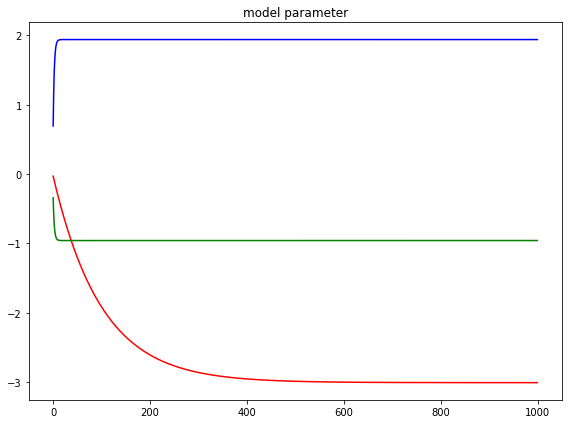

In [25]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====

    n = theta_iteration.shape[0]
    r = np.zeros(n)
    g = np.zeros(n)
    b = np.zeros(n)
    
    for i in range(0,n):
        r[i] = theta_iteration[i][0]
        g[i] = theta_iteration[i][1]
        b[i] = theta_iteration[i][2]
        
    plt.plot(list(range(0,n)), r, '-', color = 'red')
    plt.plot(list(range(0,n)), g, '-', color = 'green')
    plt.plot(list(range(0,n)), b, '-', color = 'blue')

    # ============================
    plt.tight_layout()
    plt.show()
    
plot_model_parameter(theta_iteration)

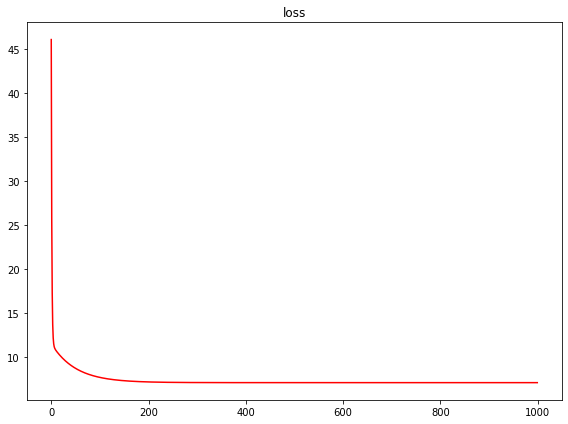

In [12]:
plot_loss_curve(loss_iteration)

3


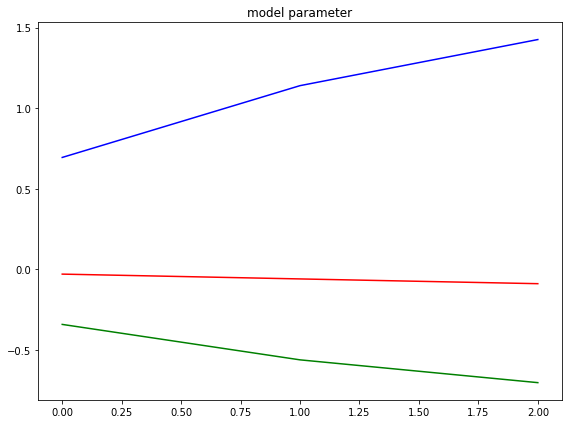

In [21]:
plot_model_parameter(theta_iteration)

In [14]:
# ===== FILL UP THE CODE =====

X  = np.arange(-15, 15, 0.1)
Y  = np.arange(-15, 15, 0.1)
XX,YY = np.meshgrid(X,Y)

ZZ = theta[0] + theta[1]*XX + theta[2]*YY

# ============================

def plot_surface(XX, YY, ZZ, xx, yy, zz):

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('regression surface')

    ax  = plt.axes(projection='3d')
    # ===== FILL UP THE CODE =====

    ax.plot_wireframe(XX,YY,ZZ, color='yellow')
    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    #ax.view_init(0,90)
    
    # ============================
    plt.tight_layout()
    plt.show()

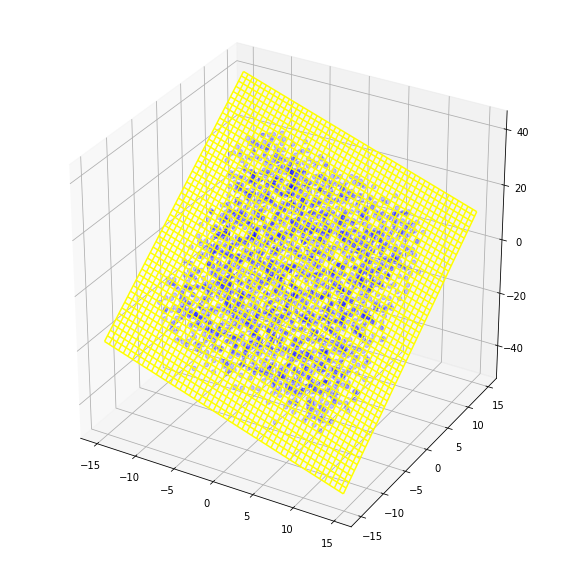

In [15]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

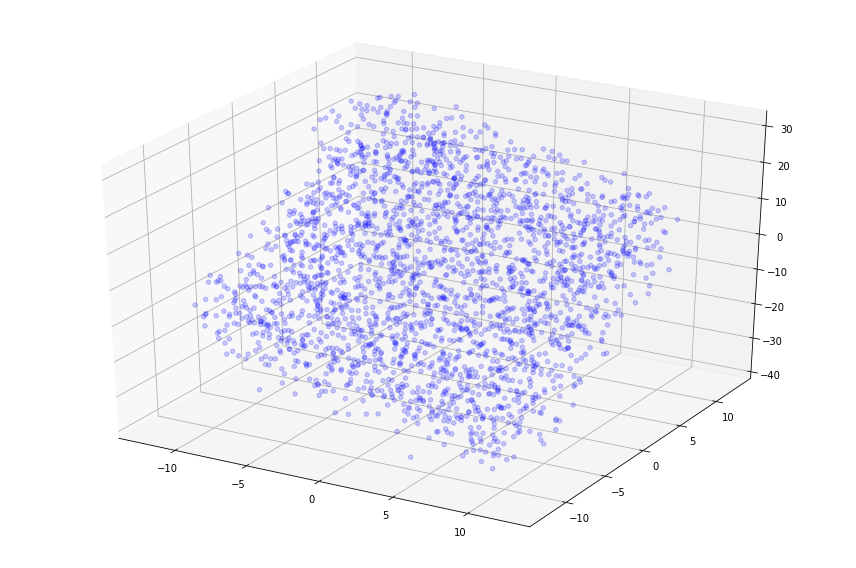

In [16]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

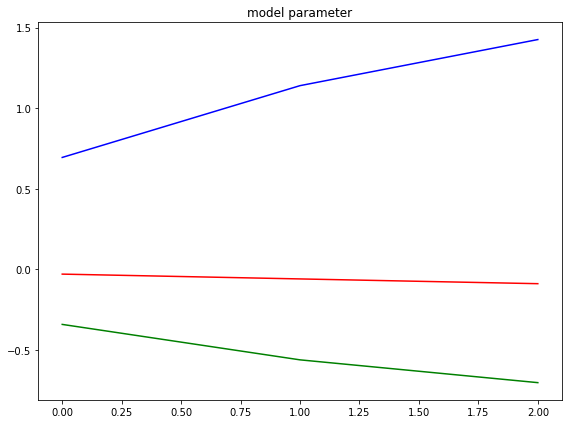

In [17]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

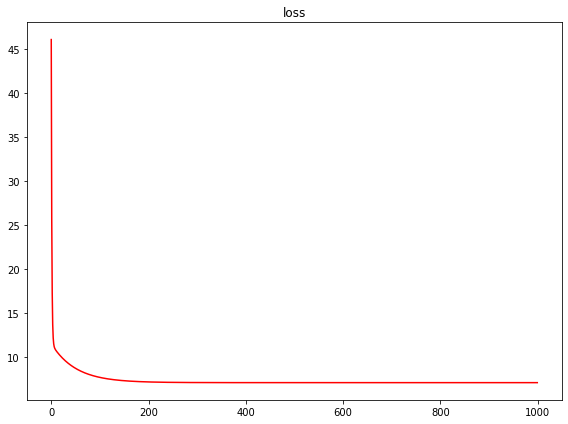

In [18]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

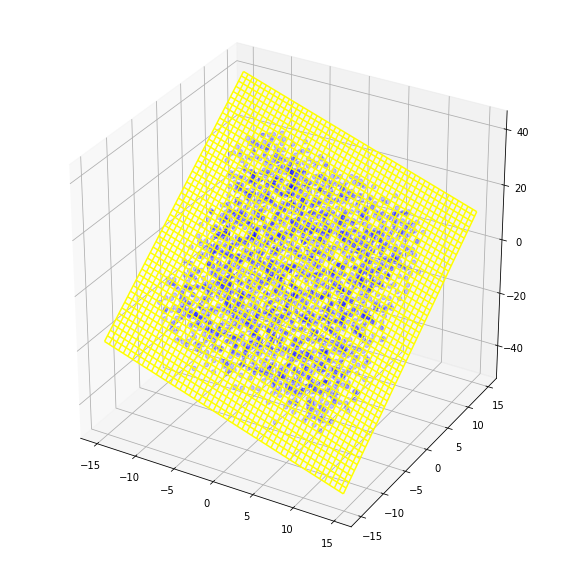

In [19]:
plot_surface(XX, YY, ZZ, xx, yy, zz)